In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

In [2]:
df = pd.read_excel("Call_Center_CSAT_Data.xlsx")
df.head()

,CallId,CallDuration,CallTransfer,CSAT
0,649887.0,10.0,1.0,4.0
1,854768.0,12.5,1.0,3.0
2,725809.0,11.7,1.0,3.0
3,560188.0,15.5,1.0,2.0
4,551191.0,12.5,1.0,3.0


In [3]:
df.shape

(1000, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CallId        1000 non-null   float64
 1   CallDuration  1000 non-null   float64
 2   CallTransfer  1000 non-null   float64
 3   CSAT          1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [5]:
df.isnull().sum()

CallId          0
CallDuration    0
CallTransfer    0
CSAT            0
dtype: int64

Task 1

Perform exploratory analysis of the data provided and find the following:
    
a. Calculate the mean and standard deviation for the CSAT score.

b. Calculate the mean ‘CallDuration’ grouped by CSAT score. What can you interpret about the relationship between ‘CallDuration’ and CSAT score? What would be your recommendation to the bank based on this?


In [7]:
# mean and Std dev

csat_mean = df['CSAT'].mean()
csat_std = df['CSAT'].std()

print("CSAT mean : ", csat_mean)
print("CSAT STD DEV : ", csat_std)

CSAT mean :  3.246
CSAT STD DEV :  1.129938388037494


In [8]:
# mean callduration per csat score
mean_duration_by_csat = df.groupby('CSAT')['CallDuration'].mean().reset_index()
mean_duration_by_csat

,CSAT,CallDuration
0,0.0,16.896667
1,1.0,14.742593
2,2.0,14.486364
3,3.0,13.218551
4,4.0,10.378533
5,5.0,8.748387


<ipython-input-9-2595141c4030>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'CSAT',y = 'CallDuration',data = df,estimator = 'mean',ci = None)


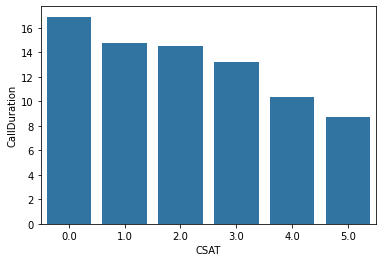

In [9]:
sns.barplot(x = 'CSAT',y = 'CallDuration',data = df,estimator = 'mean',ci = None)
plt.show()

In [10]:
# happy customers have less call duration
# customers having high call duration it seems frustated hence low score

Task 2

Using the data provided, estimate the range for the mean CSAT rating of the population, assuming a 95% confidence interval. Industry benchmarks indicate that an average CSAT of 3.5 is considered ideal for call centre operations. Based on the estimated range for the mean CSAT rating, do we have enough confidence to say that our CSAT is above the benchmark of 3.5?


In [11]:
# sample stats :  mean, std dev, n
csat_mean = df['CSAT'].mean()
csat_std = df['CSAT'].std()
n = df['CSAT'].count()

# standard error : std/sq.root(n)
se = csat_std/np.sqrt(n)

#CI = find 95% CI using t-distribution : hint : use scipy t-distibution function
ci = st.t.interval(0.95,df = n-1,loc = csat_mean,scale = se)

print("95% confidence interval : ", ci)

95% confidence interval :  (3.1758820285359066, 3.3161179714640934)


In [ ]:
# CSAT is below the benchmark of 3.5

# we do not have enough confidence to say CSAT is above the benchmark of 3.5

Task 3

An alternate version of the industry benchmark is that at least 50% of the customers should give a rating of 4 and above. From the data, do we have enough confidence to say that we meet this industry benchmark? Assume a 95% confidence interval.
Hint: Create a new variable called ‘PropCSAT’, which is 1 if the score is 4 and above, and 0 in all other scenarios. Find the range for this variable.
 
Note: For this task, we are classifying the data into two groups using the ‘PropCSAT’ variable to find the proportion of customers who give a rating of 4 or above. Hence, we will be calculating a sample proportion and standard error of proportion here instead of the mean and Standard Error of Mean (SEM).
The formulae for these are given below:
    
    Sample proportion: p ̂=  x/n

    Standard error of proportion: √(p ̂(1-p ̂))/n
where,
p ̂: : Sample proportion
x: The count of data points in the sample with the desired characteristics
n: The total number of data points in the sample
 


In [12]:
# create new feature
df['PropCSAT'] = (df['CSAT']>=4).astype(int)

print(df['PropCSAT'].value_counts())

0    539
1    461
Name: PropCSAT, dtype: int64


In [13]:
# compute sample proportion

# x = sum of PropCSAT col
n = len(df)
x = df['PropCSAT'].sum()
p_hat = x/n

print("Sample size : ", n)
print("Number of samples with CSAT>=4 : ", x)
print("Sample proportion : ", p_hat)


Sample size :  1000
Number of samples with CSAT>=4 :  461
Sample proportion :  0.461


In [14]:
# compute standard error of proportion

se = np.sqrt(p_hat*(1-p_hat)/n)
print("Standard error : ", se)

Standard error :  0.015763216676808068


In [15]:
# compute 95% confidence interval : p-hat ± (z-score * SE)

z = 1.96
ci_lower = p_hat-(z * se)
ci_upper = p_hat+(z * se)

print("95 % confident interval for proportion : ", (ci_lower,ci_upper))

95 % confident interval for proportion :  (0.4301040953134562, 0.4918959046865438)


In [17]:
# An alternate version of the industry benchmark is that at least 50% = 0.5

In [16]:
# entire CI is below 0.5, so we do not have enough evidence to say 
# An alternate version of the industry benchmark is that at least 50%

In [18]:
# experiment with diff value

z = 1.96
ci_lower = 0.54-(z * se)
ci_upper = 0.54+(z * se)

print("95 % confident interval for proportion : ", (ci_lower,ci_upper))

95 % confident interval for proportion :  (0.5091040953134562, 0.5708959046865438)
